In [271]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [272]:
# loading the training dataset

data = pd.read_csv('train_s3TEQDk.csv')
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [273]:
data.shape

(245725, 11)

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [275]:
data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [276]:
data.corr()*100

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,100.000000,63.124241,14.523219,23.081379
Vintage,63.124241,100.000000,16.743348,27.964209
Avg_Account_Balance,14.523219,16.743348,100.000000,5.337046
Is_Lead,23.081379,27.964209,5.337046,100.000000


In [277]:
data['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

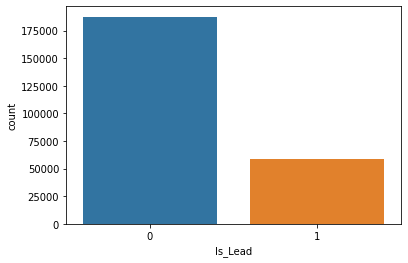

In [278]:
sns.countplot(data['Is_Lead'])
plt.show()

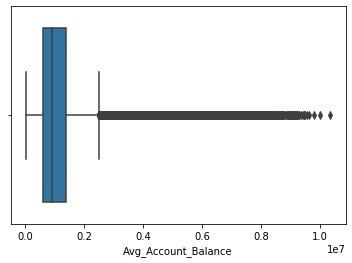

In [279]:
sns.boxplot(data['Avg_Account_Balance'])
plt.show()

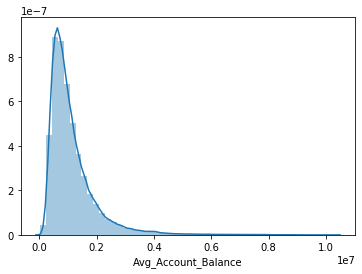

In [280]:
sns.distplot(data['Avg_Account_Balance'])
plt.show()

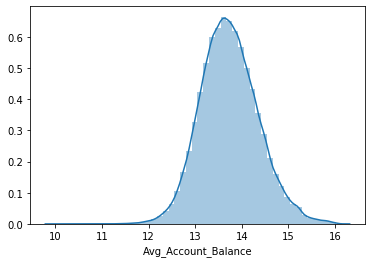

In [281]:
# log tranformation on feature

from scipy import stats

data['Avg_Account_Balance'] = np.log(data['Avg_Account_Balance'])
sns.distplot(data['Avg_Account_Balance'])
plt.show()

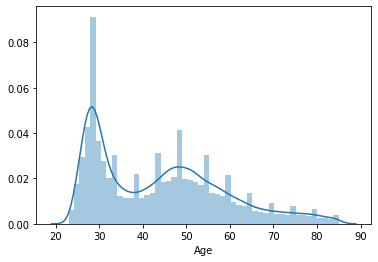

In [282]:
sns.distplot(data['Age'])
plt.show()

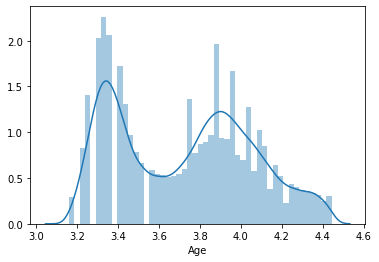

In [283]:
data['Age'] = np.log(data['Age'])
sns.distplot(data['Age'])
plt.show()

In [284]:
data['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [285]:
# replacing Null values in Credit product column with 'Unknown'.

data.Credit_Product.replace(np.NaN, 'Unknown', inplace=True)

In [286]:
data['Credit_Product'].value_counts()

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

In [287]:
data['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [288]:
data['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [289]:
data['Is_Active'].value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [290]:
data['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [291]:
data['Vintage'].value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

In [292]:
data['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [680]:
# converting categorical values to numerical values

convert_nums = { 
                 'Occupation' : {'Salaried' : 0, 'Self_Employed' : 1, 'Entrepreneur' : 2, 'Other' : 3},
                 'Credit_Product' : {'No' : 0, 'Yes' : 1, 'Unknown' : 2},
                 
                 'Channel_Code' : {'X1' : 1, 'X2' : 2, 'X3' : 3, 'X4' : 4}
               }

In [681]:
# removing unwanted columns

data1 = data.drop(columns=['ID','Region_Code','Vintage','Gender','Is_Active'], axis = 1)
data1.head()

,Age,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
0,4.290459,Other,X3,No,13.860193,0
1,3.401197,Salaried,X1,No,13.274205,0
2,4.025352,Self_Employed,X3,No,14.210464,0
3,3.526361,Salaried,X1,No,13.061453,0
4,3.401197,Salaried,X1,No,13.695360,0


In [682]:
conv_data = data1.replace(convert_nums)
conv_data.head()

,Age,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
0,4.290459,3,3,0,13.860193,0
1,3.401197,0,1,0,13.274205,0
2,4.025352,1,3,0,14.210464,0
3,3.526361,0,1,0,13.061453,0
4,3.401197,0,1,0,13.695360,0


In [683]:
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  245725 non-null  float64
 1   Occupation           245725 non-null  int64  
 2   Channel_Code         245725 non-null  int64  
 3   Credit_Product       245725 non-null  int64  
 4   Avg_Account_Balance  245725 non-null  float64
 5   Is_Lead              245725 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 11.2 MB


In [684]:
# Correlation between data

conv_data.corr()*100

,Age,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
Age,100.000000,49.957767,64.762497,28.847642,17.529724,25.491482
Occupation,49.957767,100.000000,29.161812,11.117301,9.220540,6.391825
Channel_Code,64.762497,29.161812,100.000000,31.291414,12.723600,26.121143
Credit_Product,28.847642,11.117301,31.291414,100.000000,9.574812,57.044929
Avg_Account_Balance,17.529724,9.220540,12.723600,9.574812,100.000000,7.329099
Is_Lead,25.491482,6.391825,26.121143,57.044929,7.329099,100.000000


In [685]:
prep_data = conv_data
prep_data.head()

,Age,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
0,4.290459,3,3,0,13.860193,0
1,3.401197,0,1,0,13.274205,0
2,4.025352,1,3,0,14.210464,0
3,3.526361,0,1,0,13.061453,0
4,3.401197,0,1,0,13.695360,0


In [686]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

In [687]:
dataset = prep_data.values
X = dataset[:,0:5]
y = dataset[:,5]


In [690]:
# using SMOTE technique to balance the dataset

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)


In [691]:
# splitting into train test


seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=test_size, random_state=seed)

In [698]:
# applying the XGBoost classifier

from xgboost import XGBClassifier

XGBmodel = XGBClassifier()
eval_set = [(X_test, y_test)]
XGBmodel.fit(X_train, y_train, eval_metric='error', verbose=True, eval_set=eval_set)
print(XGBmodel)


predictions = XGBmodel.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('roc_auc_score : ', roc_auc_score(y_test, predictions))
print("F1 score : ",f1_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))


[0]	validation_0-error:0.20616
[1]	validation_0-error:0.20469
[2]	validation_0-error:0.20307
[3]	validation_0-error:0.20156
[4]	validation_0-error:0.20304
[5]	validation_0-error:0.20224
[6]	validation_0-error:0.20273
[7]	validation_0-error:0.20249
[8]	validation_0-error:0.20233
[9]	validation_0-error:0.20137
[10]	validation_0-error:0.19905
[11]	validation_0-error:0.19813
[12]	validation_0-error:0.19789
[13]	validation_0-error:0.19653
[14]	validation_0-error:0.19612
[15]	validation_0-error:0.19521
[16]	validation_0-error:0.19085
[17]	validation_0-error:0.18993
[18]	validation_0-error:0.18748
[19]	validation_0-error:0.18686
[20]	validation_0-error:0.18448
[21]	validation_0-error:0.18335
[22]	validation_0-error:0.18369
[23]	validation_0-error:0.18339
[24]	validation_0-error:0.18338
[25]	validation_0-error:0.18266
[26]	validation_0-error:0.18231
[27]	validation_0-error:0.18043
[28]	validation_0-error:0.17974
[29]	validation_0-error:0.17929
[30]	validation_0-error:0.17861
[31]	validation_0-

In [699]:
# loading the test dataset

data_test1 = pd.read_csv('test_mSzZ8RL.csv')
data_test1.head()


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [700]:
data_test = pd.DataFrame(data_test1)

In [701]:
data_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [702]:
data_test['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [703]:
# preprocessing the test dataset


data_test.Credit_Product.replace(np.NaN, 'Unknown', inplace=True)
data_test['Avg_Account_Balance'] = np.log(data_test['Avg_Account_Balance'])
data_test['Age'] = np.log(data_test['Age'])
data_test.drop(columns=['ID','Region_Code','Vintage','Gender','Is_Active'], axis = 1, inplace=True)
data_test.replace(convert_nums, inplace=True)
test_dataset = data_test
test_dataset.head()

,Age,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance
0,3.367296,3,1,1,13.517598
1,3.761200,3,2,2,13.738129
2,3.433987,0,1,0,12.282798
3,3.367296,3,1,0,13.674028
4,3.367296,3,1,0,13.395572


In [704]:
# predicting the values from the test dataset

test_data = test_dataset.values
X = test_data[:,0:5]
lead = XGBmodel.predict(X).tolist()


In [705]:
len(lead)

105312

In [706]:
len(test_data)

105312

In [707]:
test_data = pd.DataFrame(test_data)

In [708]:
test_data.head()

,0,1,2,3,4
0,3.367296,3.0,1.0,1.0,13.517598
1,3.761200,3.0,2.0,2.0,13.738129
2,3.433987,0.0,1.0,0.0,12.282798
3,3.367296,3.0,1.0,0.0,13.674028
4,3.367296,3.0,1.0,0.0,13.395572


In [709]:
# creating a DataFrame for the solution file

submission_data = pd.DataFrame(data = data_test1, columns=['ID'], dtype=str)
submission_data['Is_Lead'] = lead

In [710]:
submission_data

,ID,Is_Lead
0,VBENBARO,0.0
1,CCMEWNKY,1.0
2,VK3KGA9M,0.0
3,TT8RPZVC,0.0
4,SHQZEYTZ,0.0
...,...,...
105307,DBENJOYI,1.0
105308,CWQ72DWS,1.0
105309,HDESC8GU,0.0
105310,2PW4SFCA,0.0


In [711]:
# displaying counts of number of Leads

submission_data['Is_Lead'].value_counts()

0.0    75693
1.0    29619
Name: Is_Lead, dtype: int64

In [712]:
# Exporting solution data to CSV file.

submission_data.to_csv('XGB_ex_G_Predictions_Submission.csv',header=True, index=None)